# Barcode Detector using Classical CV Techniques

This project utilizes a combination of image thresholding, edge detection, and morphological operations to detect barcodes in images. The workflow for this project is as follows:


![Barcode Scanner Diagram](BarcodeScanner_Diagram.png)

## Overview
This method is one of many valid approaches to detecting barcodes in an image. There is also a Python Library, pyzbar, which can automatically find and read barcodes. However, the goal of this project is to explore how morphological processing can be used to identify features of interest in an image.

Additionally, the project assumes that there is only one barcode per image.

In [1]:
# Load in required libraries
%matplotlib inline
import os
import os.path as op
import numpy as np
import cv2
import matplotlib.pylab as plt

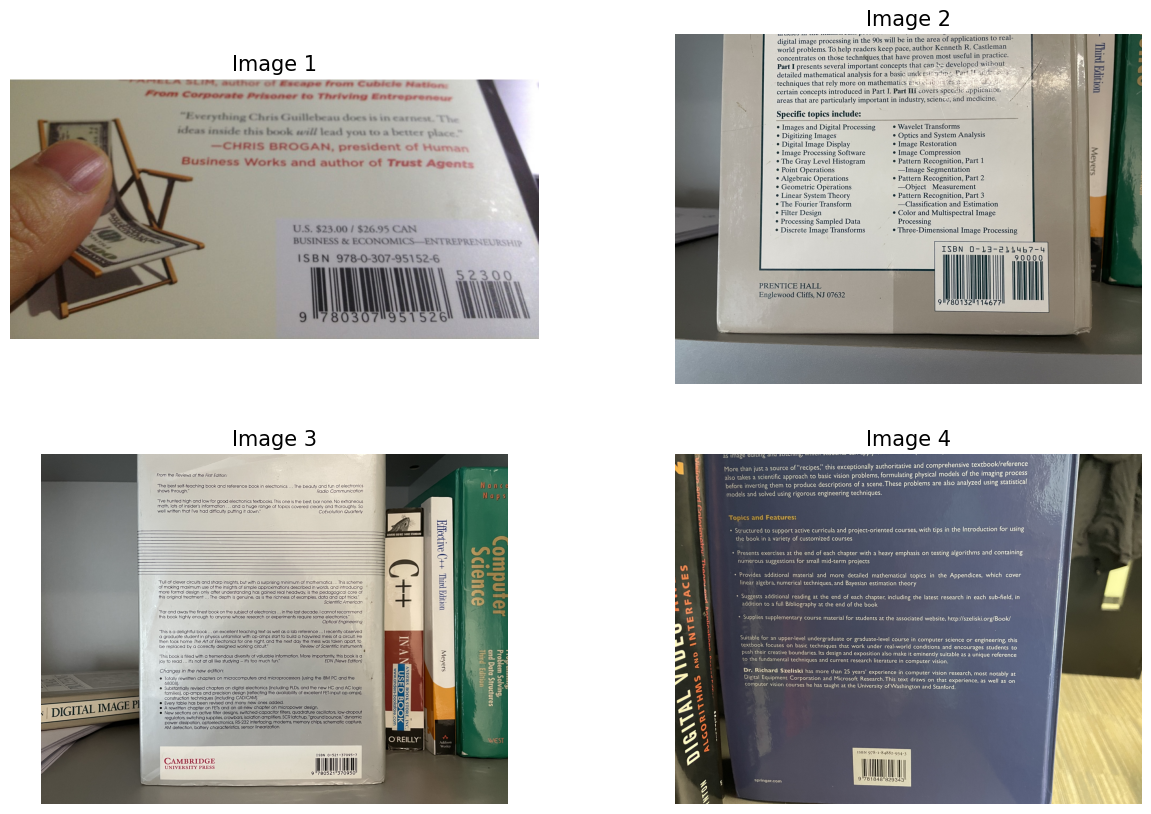

In [2]:
# Read and display images. There are 4 barcode images provided.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
    img = cv2.imread("bar_code" + str(i+1) + ".jpg")
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert bgr to rgb

    # display image
    axes[i // 2, i % 2].imshow(img)
    axes[i // 2, i % 2].set_title('Image ' + str(i + 1), size=15)
    axes[i // 2, i % 2].axis('off')
plt.show()

## Convert Image to Grayscale
Convert images to grayscale using OpenCV's `cvtColor` function.

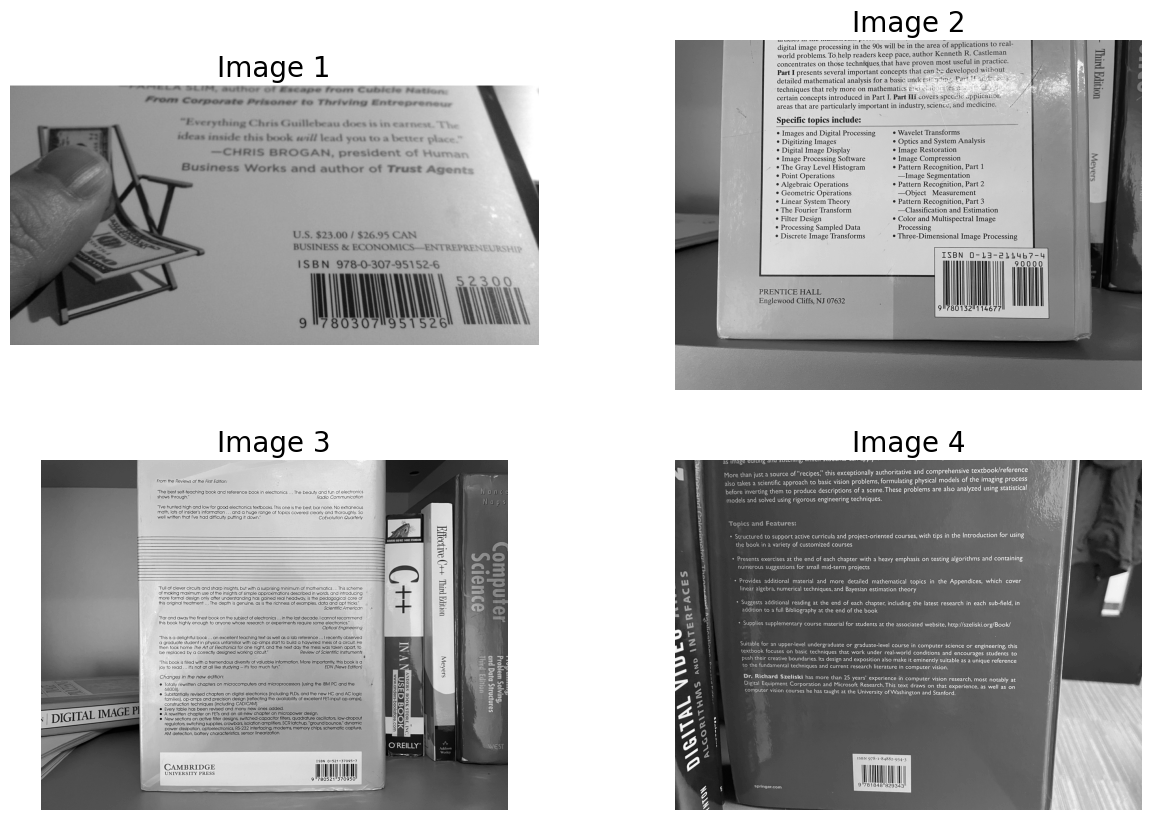

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# convert to greyscale using cvtColor
for i in range(4):
    img = cv2.imread("bar_code" + str(i+1) + ".jpg")
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert bgr to rgb
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert RGB to greyscale

    # Display images
    axes[i // 2, i % 2].imshow(img, cmap='gray')
    axes[i // 2, i % 2].set_title('Image ' + str(i + 1), size=20)
    axes[i // 2, i % 2].axis('off')

plt.show()

## Calculate the Image Gradients

The image gradients, which highlight the edges of the image, are calculated using the `cv2.Sobel` function. Both horizontal and vertical gradients are computed separately and combined using the `cv2.subtract` function. Various kernel sizes (`ksize`) were experimented with to determine the optimal size for detecting barcode lines. After calculating the gradients, the image was scaled and converted to an absolute value using the `cv2.convertScaleAbs` function.



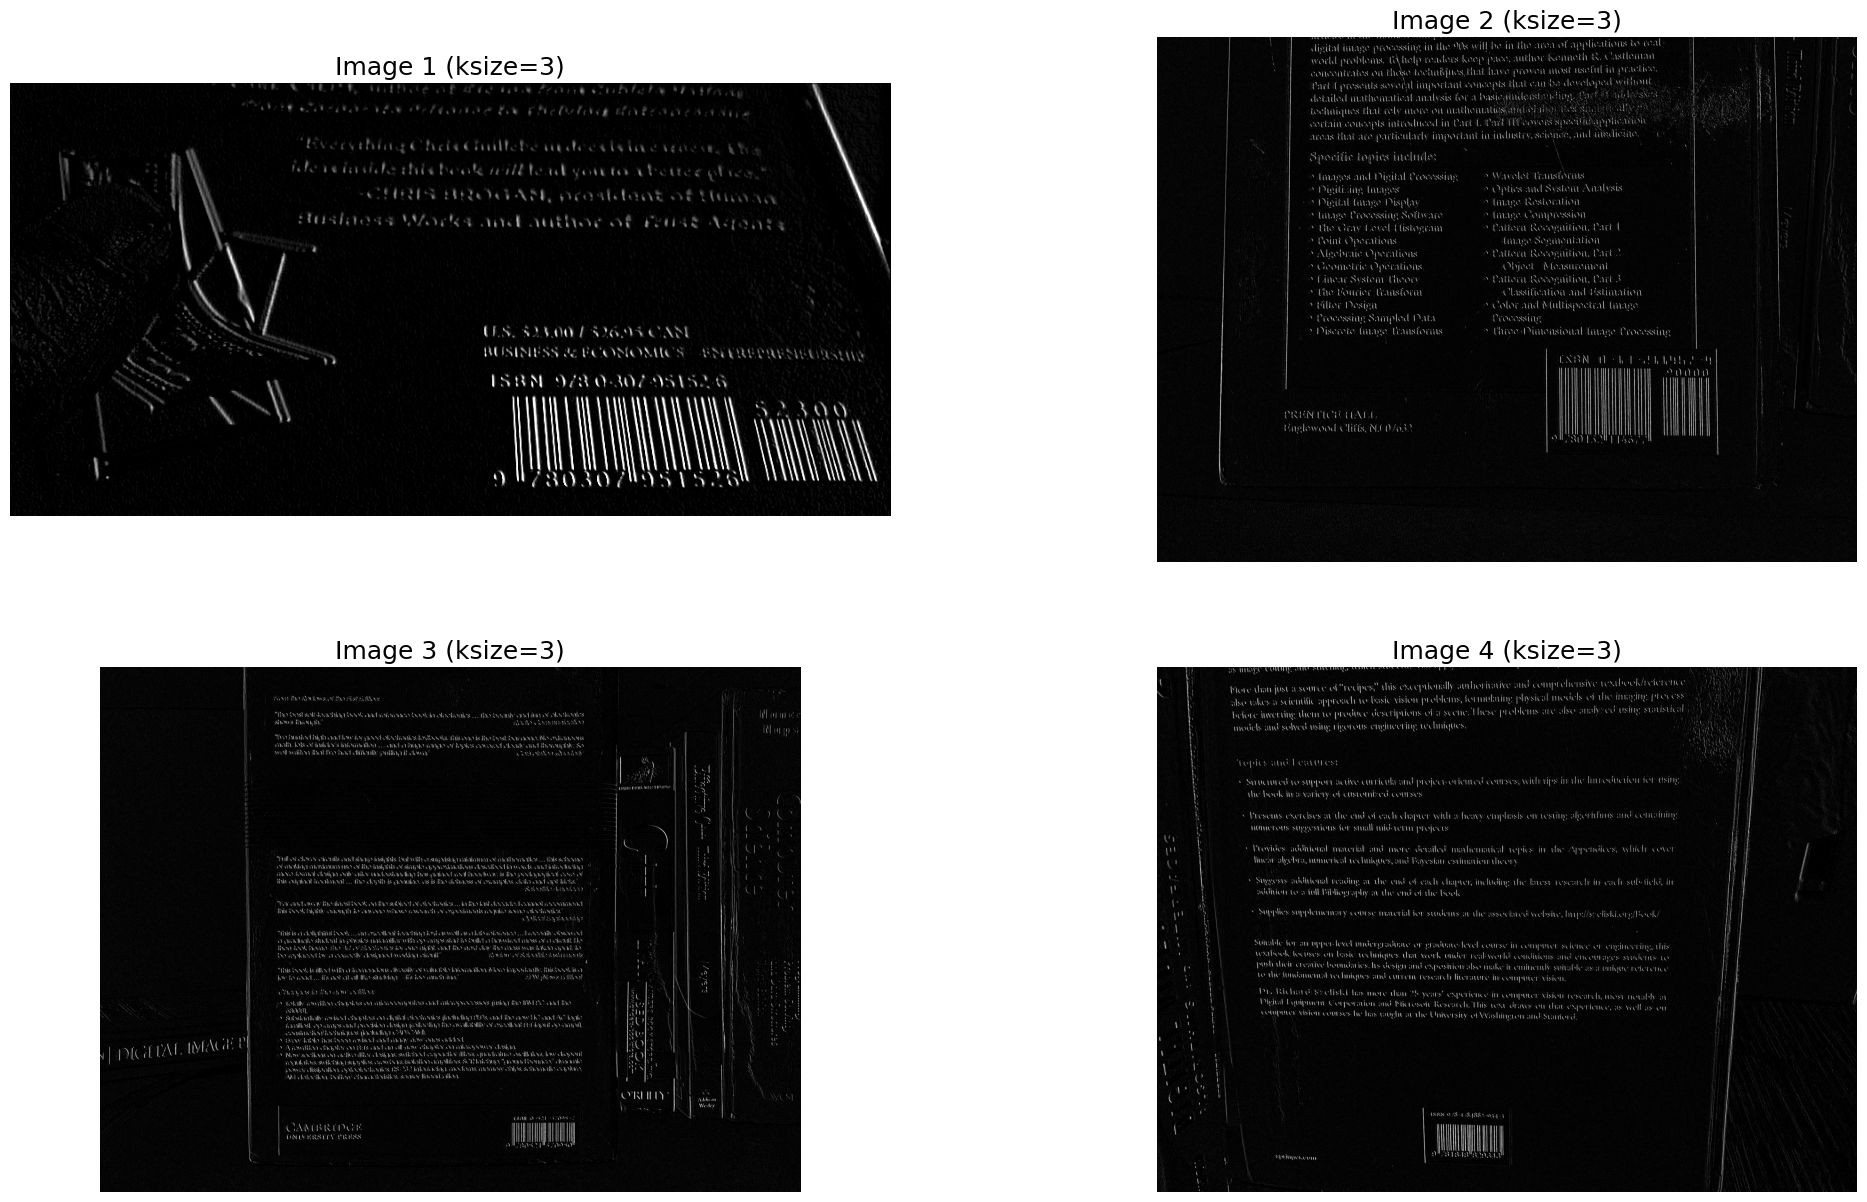

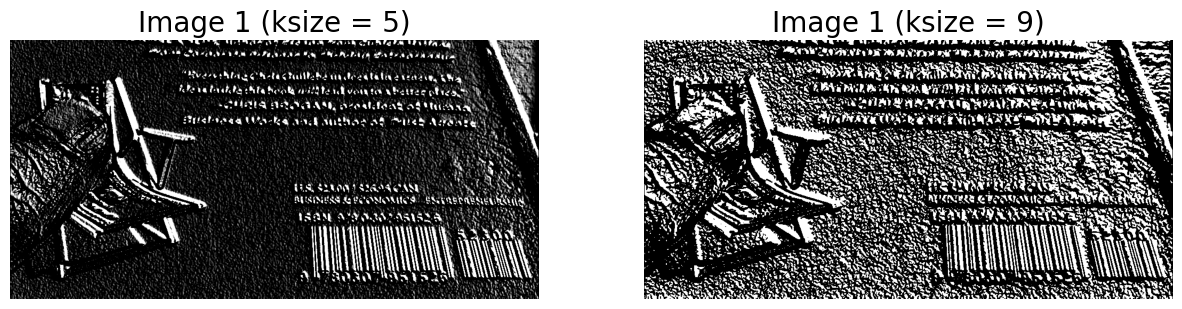

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(25, 15))
images = []

for i in range(4):
    img = cv2.imread("bar_code" + str(i + 1) + ".jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # convert RGB to grayscale

    ksize = 3  # Set ksize to 3 
    img_x = cv2.Sobel(img, cv2.CV_8UC1, 1, 0, ksize=ksize, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    img_y = cv2.Sobel(img, cv2.CV_8UC1, 0, 1, ksize=ksize, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

    img = cv2.subtract(img_x, img_y)
    img = cv2.convertScaleAbs(img)

    axes[i // 2, i % 2].imshow(img, cmap='gray')
    axes[i // 2, i % 2].set_title('Image ' + str(i + 1) + ' (ksize=' + str(ksize) + ')', size=18)
    axes[i // 2, i % 2].axis('off')
    images.append(img)

plt.show()

img1 = cv2.imread("bar_code1.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

img_result = [] 

for ksize in [5, 9]:
    img_x = cv2.Sobel(img1, cv2.CV_8UC1, 1, 0, ksize=ksize, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    img_y = cv2.Sobel(img1, cv2.CV_8UC1, 0, 1, ksize=ksize, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

    img = cv2.subtract(img_x, img_y)
    img = cv2.convertScaleAbs(img)

    img_result.append(img) 

# Display images
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1), plt.imshow(img_result[0], cmap='gray'), plt.title('Image 1 (ksize = 5)', size=20), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_result[1], cmap='gray'), plt.title('Image 1 (ksize = 9)', size=20), plt.axis('off')

plt.show()


### Comments
After experimentation, ksize=3 was found as the ideal, giving clear black and white bar separations with distinct boundaries. The bottom figure demonstrates image 1 with ksize of 5 and 9. This produces a grainy result, and isn't ideal for highlighting the barcodes shape in the images. 

It is important to detect gradients in order to find the contours and outlines of objects in the image and later feature extraction of the barcodes. As the sobel operation is used, both the x and y gradients are calculated, which enhances clarity of lines which aren't perfectly vertical/horizontal. 

## Blur the image
Gaussian and standard blurring techniques were applied to the images to reduce noise and small gradients while preserving larger ones. A kernel size of 3x3 was found to be effective in enhancing the visibility of the barcode without excessive blurring.



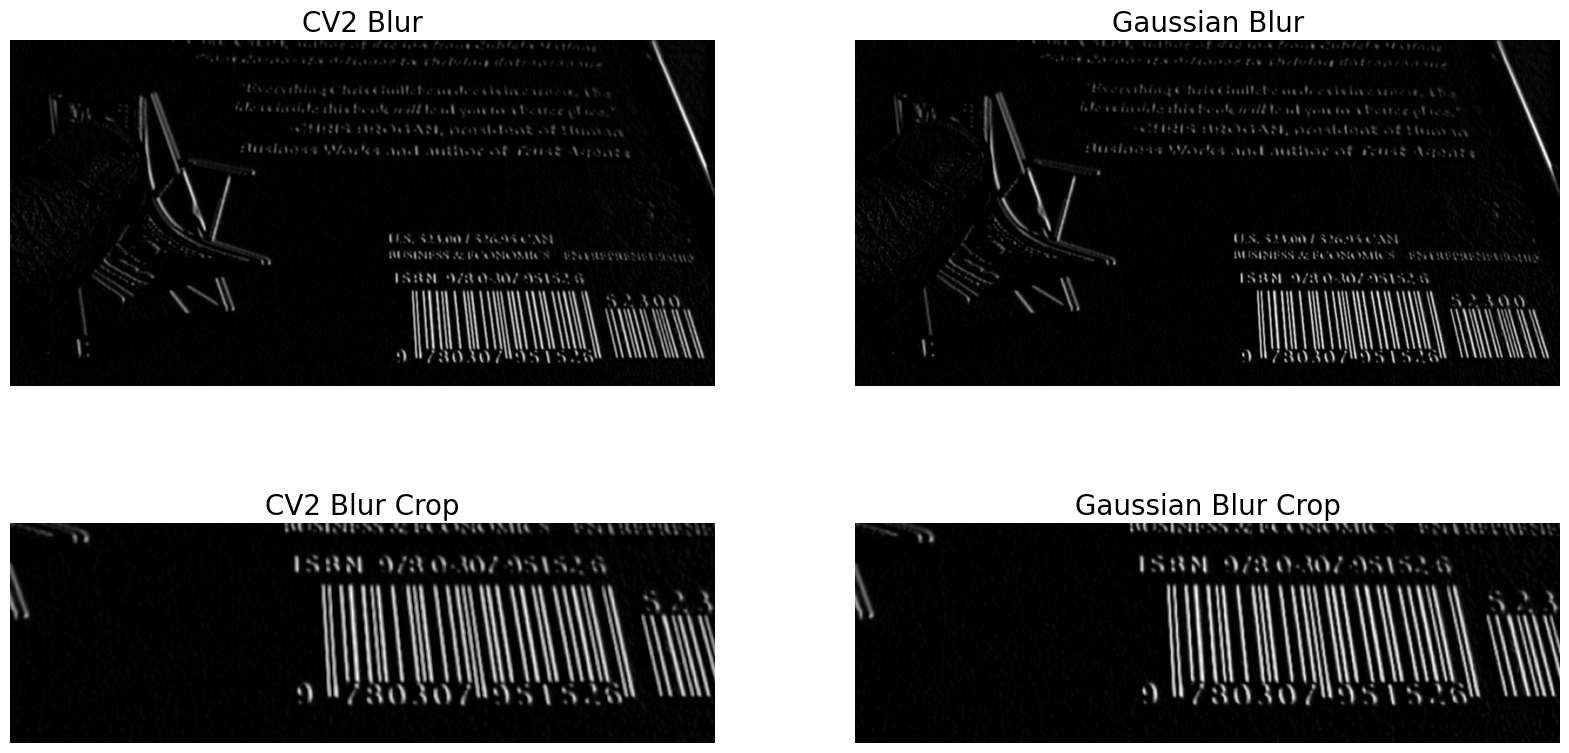

In [5]:
gauss_images = []

for i in range(4):
    # blur the image
    blur_img = cv2.blur(images[0], (3, 3))

    # blur the image with a different technique
    gauss_blur_img = cv2.GaussianBlur(images[i], (3, 3), 0)
    gauss_images.append(gauss_blur_img)

    # Crop the images to the barcode region
    blur_crop = blur_img[300:500, 300:900]
    gauss_blur_crop = gauss_images[0][300:500, 300:900]

# display images 
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1), plt.imshow(blur_img, cmap='gray'), plt.title('CV2 Blur', size=20), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(gauss_images[0], cmap='gray'), plt.title('Gaussian Blur', size=20), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(blur_crop, cmap='gray'), plt.title('CV2 Blur Crop', size=20), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(gauss_blur_crop, cmap='gray'), plt.title('Gaussian Blur Crop', size=20), plt.axis('off')
plt.show()



### Comments
Both CV2 blur and Gaussian blur were performed on the image. Gaussian, with a kernel size of 3x3, offered marginally better results due to a superior reduction in gradients and image noise. Pushing either blur technique further than a 3x3 kernel size caused excessive smearing on the images.

## Convert to binary image
Next, the images were converted to binary using manual thresholding and Otsu's method to clearly distinguish the barcode from the background. Otsu's method automatically determines the optimal threshold for separating an image into foreground and background by minimizing the variance within each class of pixel intensities. The manual thresholding method, with a value of 100, 255, provided cleaner outlines and fewer artifacts compared to Otsu's method.


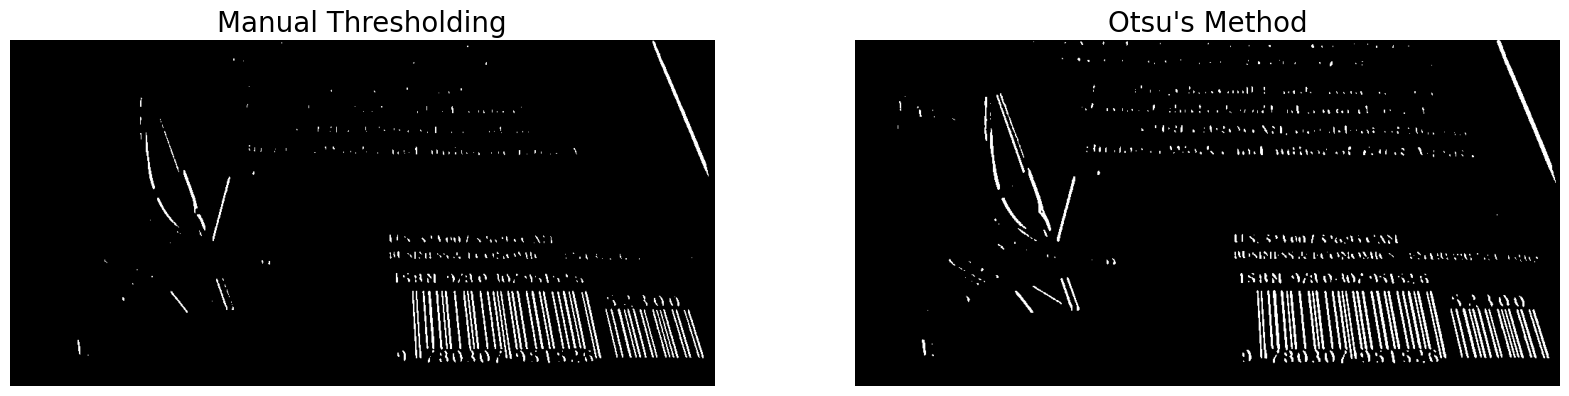

In [6]:
manual_thresh_img = []
otsu_thresh_img = []

for i in range(4):
    # threshold the image with manual thresholding
    manual_threshold, manual_threshed = cv2.threshold(gauss_images[i], 100, 255, cv2.THRESH_BINARY)
    manual_thresh_img.append(manual_threshed)

    # threshold the image with otsu's method
    otsu_threshold, otsu_threshed = cv2.threshold(gauss_images[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    otsu_thresh_img.append(otsu_threshed)

# display images
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1), plt.imshow(manual_thresh_img[0], cmap='gray'), plt.title('Manual Thresholding', size=20), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(otsu_thresh_img[0], cmap='gray'), plt.title("Otsu's Method", size=20), plt.axis('off')
plt.show()

### Comments
First, the image is thresholded using the manual method with a value of 100, 255. The second method uses Otsu's method to automatically select a threshold value. Both techniques work for making the image more clear and readable, with the manual method giving more refined objects than Otsu's. The manual method is used going forward as it provides cleaner object outlines and less artifacts. 

## Perform erosion and dilation to clean up image

Next, morphological closing was applied to remove gaps in the barcode, followed by erosion to eliminate small artifacts and dilation to restore the eroded barcode size. A rectangular structuring element was used, and the operations were fine-tuned with several iterations to accurately identify the barcode shapes.


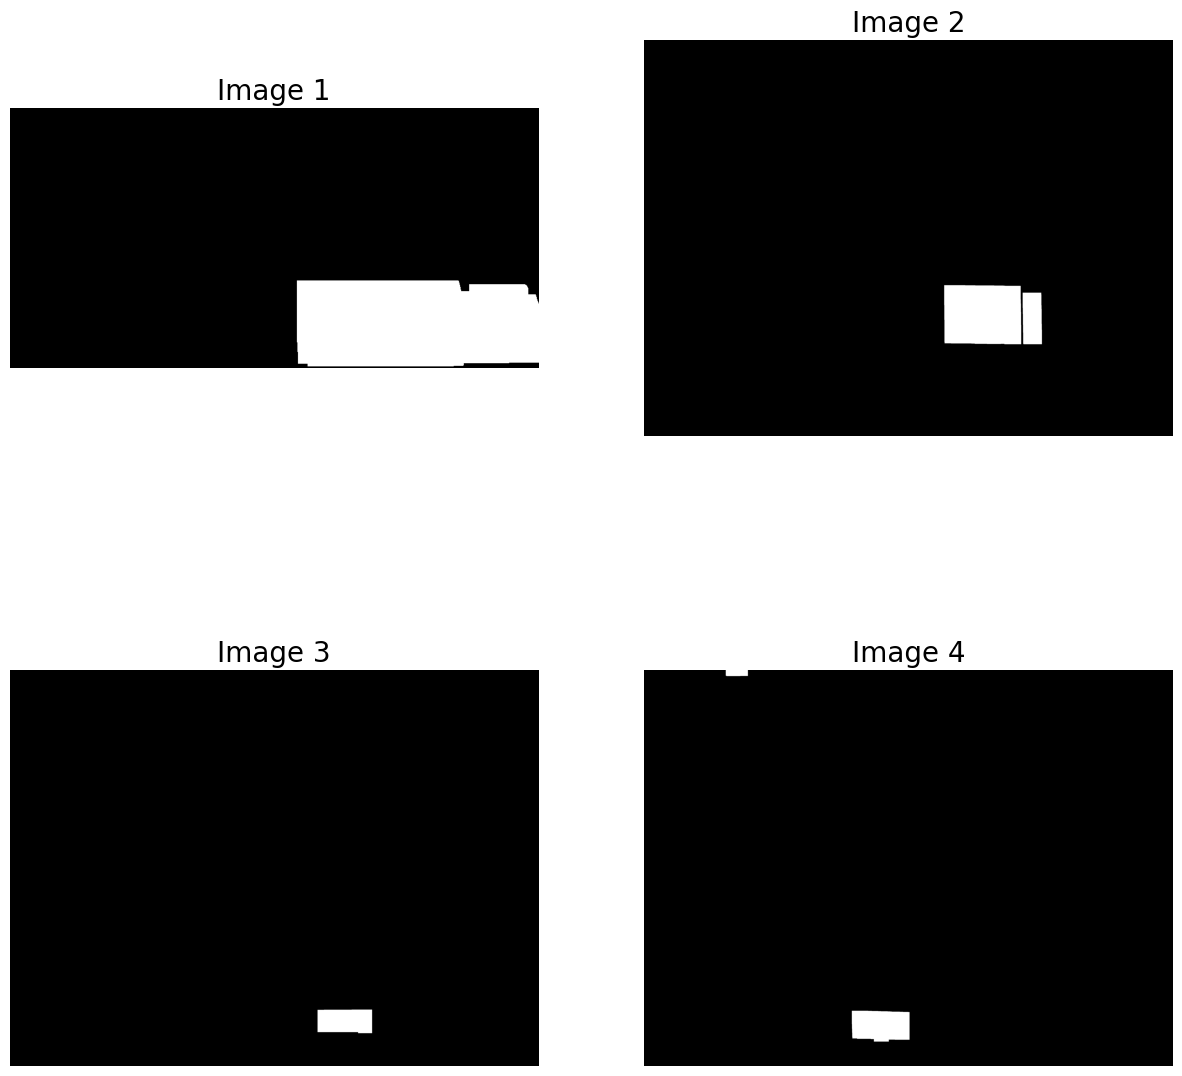

In [ ]:
cleaned_images = []

# Define the closing kernel
struct = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))

for i in range(4):
    # Perform morphological closing
    closed_img = cv2.morphologyEx(otsu_thresh_img[i], cv2.MORPH_CLOSE, struct)

    # Perform erosions and dilations
    erosion_img = cv2.erode(closed_img, None, iterations=20)
    dilation_img = cv2.dilate(erosion_img, None, iterations=50)

    cleaned_images.append(dilation_img)

# Display images
plt.figure(figsize=(15, 15))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cleaned_images[i], cmap='gray')
    plt.title('Image ' + str(i + 1), size=20)
    plt.axis('off')

plt.show()



### Comments
Firstly, morphological closing is performed to remove any gaps in the barcode but keep the overall shape. Then, erosion is done to remove remaining small artifacts, and dilation is done to restore the size of the eroded barcode. Erosion and dilation iterations were quite high, 20 and 50 respectively, but this was necessary in order to accurately identify all of the different barcodes on the images. 

## Find the barcode

Contours were detected using the `cv2.findContours` function to outline the objects in the images. The largest contour, corresponding to the barcode, was identified and highlighted using a rotated bounding box. The `cv2.drawContours` function was then used to draw a box around the detected barcode.





C:\Users\suder\AppData\Local\Temp\ipykernel_6876\3264886677.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  bounding_box = cv2.drawContours(original_image, [np.int0(cv2.boxPoints(rotated_bounding_box))], -1, (0, 0, 255), 3)


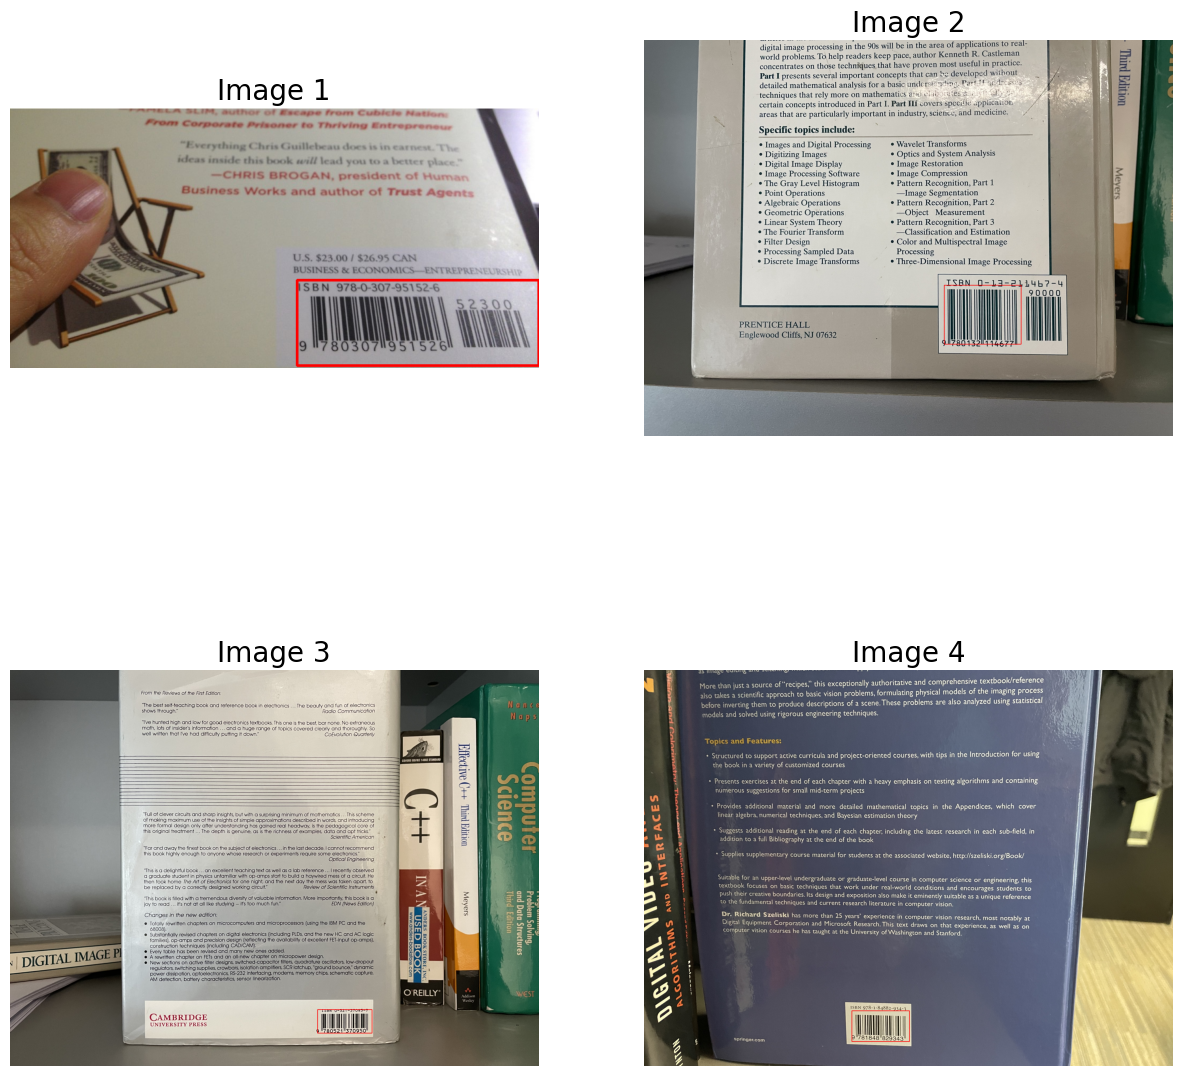

In [8]:
final_images = []

for i in range(4):
    # Find the countours in the image
    contours = cv2.findContours(cleaned_images[i].copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # sort the contours by size
    sort_contours = sorted(contours[0], key=cv2.contourArea, reverse=True)
    
    # compute rotated bounding box of largest contour
    rotated_bounding_box = cv2.minAreaRect(sort_contours[0])
    
    original_image = (cv2.imread('bar_code'+ str(i+1) + '.jpg'))

    # draw a bounding box around the detected barcode
    bounding_box = cv2.drawContours(original_image, [np.int0(cv2.boxPoints(rotated_bounding_box))], -1, (0, 0, 255), 3)
    
    final_images.append(bounding_box)    

# Display images
plt.figure(figsize=(15, 15))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor((final_images[i]), cv2.COLOR_BGR2RGB))
    plt.title('Image ' + str(i + 1), size=20)
    plt.axis('off')

plt.show()


### Comments
The outlines of objects (contours) are selected by size, and the largest is outline in the output image. If all works succesfully, the full barcode will be displayed. In some cases, large spaces between separate barcodes won't be joined in the final image, leaving small parts out of the bounding shape. This is a limitation of dealing with varying barcode shapes/sizes/positions. 

## Suggested improvements
The effectiveness of the algorithm could be improved by implementing more aggressive noise reduction techniques or experimenting with alternative edge detection methods to better isolate barcode shapes. Additionally, pattern matching approaches could enhance the accuracy by specifically targeting the repeating patterns characteristic of barcodes. Outside of software design, the effectivness of this algorithm could be improved by normalizing the types of barcodes and scenarios in which you would see them. 




